<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Healthy_Unhealthy_Leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1]:
import cv2
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [104]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 167 (delta 34), reused 0 (delta 0), pack-reused 113
Receiving objects: 100% (167/167), 43.39 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
path = os.listdir('/content/drive/MyDrive//Dataset/Training')
classes = {'Healthy':0, 'Virus':1, 'Fungal':2,'Insect':3}

**Image preprocessing and segmentation**

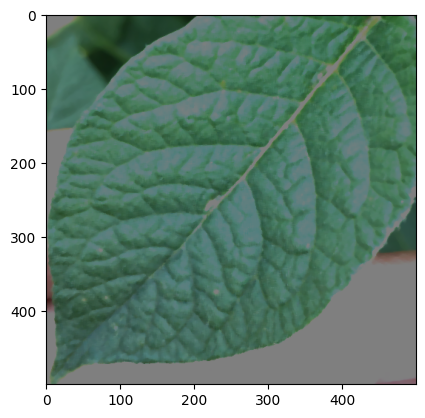

In [6]:
x=[]
y=[]
output_dir = '/content/drive/MyDrive/Dataset/Preprocessed/'
for cls in classes:
    pth = '/content/drive/MyDrive/Dataset/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j)
        img1 = cv2.resize(img, (500,500))#image resizing
        img1 = cv2.medianBlur(img1, 5)#apply median filter for remove noise
        img1 = img_as_ubyte(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) #contrast improve
        #img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
        ret,img1 = cv2.threshold(img1,127,255,cv2.THRESH_TRUNC) #Threshould technique      

        # Save preprocessed image
        output_path = os.path.join(output_dir, cls, j)
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        cv2.imwrite(output_path, img1)

               
        x.append(img1)
        y.append(img)

plt.imshow(x[0]) #image after preprocessing

**Feature extraction**

In [7]:
from skimage.feature import greycomatrix, greycoprops
import cv2
import os

preprocessed_dir = '/content/drive/MyDrive/Dataset/Preprocessed/'
glcm_features = []
labels = []

# Define GLCM parameters
distances = [1]
angles = [0]

for cls in classes:
    pth = os.path.join(preprocessed_dir, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Compute GLCM
        glcm = greycomatrix(img, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
        
        # Compute GLCM properties
        contrast = greycoprops(glcm, prop='contrast')[0, 0]
        dissimilarity = greycoprops(glcm, prop='dissimilarity')[0, 0]
        homogeneity = greycoprops(glcm, prop='homogeneity')[0, 0]
        energy = greycoprops(glcm, prop='energy')[0, 0]
        correlation = greycoprops(glcm, prop='correlation')[0, 0]

        glcm_features.append([contrast, dissimilarity, homogeneity, energy, correlation])
        labels.append(cls)  # Assign label based on the class

# Print GLCM features and labels for each image
for i, features in enumerate(glcm_features):
    print(f"Image {i+1}: Contrast={features[0]}, Dissimilarity={features[1]}, Homogeneity={features[2]}, Energy={features[3]}, Correlation={features[4]}, Label={labels[i]}")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

Image 1: Contrast=10.755074148296593, Dissimilarity=1.893799599198397, Homogeneity=0.5025844149703966, Energy=0.14079425558428335, Correlation=0.9826718189442811, Label=Healthy
Image 2: Contrast=6.33749498997996, Dissimilarity=1.4256953907815633, Homogeneity=0.5422120651492822, Energy=0.07534558178787282, Correlation=0.9920663845434442, Label=Healthy
Image 3: Contrast=9.36903006012024, Dissimilarity=1.6361643286573149, Homogeneity=0.5654219390255415, Energy=0.17068762355331385, Correlation=0.9912333607997438, Label=Healthy
Image 4: Contrast=15.090557114228456, Dissimilarity=1.5431022044088176, Homogeneity=0.6710488432459966, Energy=0.465417150102943, Correlation=0.9849410236091581, Label=Healthy
Image 5: Contrast=14.769130260521038, Dissimilarity=1.5002885771543084, Homogeneity=0.693178164001931, Energy=0.5119805473287522, Correlation=0.9888352270278835, Label=Healthy
Image 6: Contrast=16.878709418837676, Dissimilarity=2.060376753507014, Homogeneity=0.5650585159867034, Energy=0.3363362

In [74]:
import cv2
import os

preprocessed_dir = '/content/drive/MyDrive/Dataset/Preprocessed/'
gaussian_blur_features = []
labels = []

for cls in classes:
    pth = os.path.join(preprocessed_dir, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Apply Gaussian blur
        blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

        # Calculate mean and standard deviation as features
        mean = blurred_img.mean()
        std = blurred_img.std()

        gaussian_blur_features.append([mean, std])
        labels.append(cls)  # Assign label based on the class

# Print Gaussian blur features and labels for each image
for i, features in enumerate(gaussian_blur_features):
    print(f"Image {i+1}: Mean={features[0]}, Standard Deviation={features[1]}, Label={labels[i]}")


Image 1: Mean=106.983612, Standard Deviation=17.156702230716018, Label=Healthy
Image 2: Mean=110.6419, Standard Deviation=25.292431602951897, Label=Healthy
Image 3: Mean=111.913672, Standard Deviation=21.852668749523843, Label=Healthy
Image 4: Mean=106.38672, Standard Deviation=19.746735417318988, Label=Healthy
Image 5: Mean=108.402928, Standard Deviation=27.055388391719976, Label=Healthy
Image 6: Mean=106.818172, Standard Deviation=22.725040078697685, Label=Healthy
Image 7: Mean=116.349908, Standard Deviation=19.020005267915572, Label=Healthy
Image 8: Mean=108.445984, Standard Deviation=23.901468119589307, Label=Healthy
Image 9: Mean=109.468032, Standard Deviation=22.46933488216721, Label=Healthy
Image 10: Mean=107.112384, Standard Deviation=24.000967018779555, Label=Healthy
Image 11: Mean=109.251096, Standard Deviation=15.990758793715324, Label=Healthy
Image 12: Mean=99.57832, Standard Deviation=21.85200553673735, Label=Healthy
Image 13: Mean=110.824676, Standard Deviation=20.2107906

**Extract color-based features - Color Co-occurrence Matrix (CCM)**

In [75]:
import os
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops

# Set the number of levels for each color channel
num_levels = 8

# Set the distance and angle offsets for co-occurrence calculation
distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Define the directory path containing the color images
image_dir = '/content/drive/MyDrive/Dataset/Preprocessed/'

# Collect image data
image_data = []
for cls in classes:
    class_dir = os.path.join(image_dir, cls)
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)
        img = cv2.imread(image_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

        # Rescale the grayscale image values to fit within the range of 0 to num_levels - 1
        img_rescaled = (img_gray / 255 * (num_levels - 1)).astype(np.uint8)

        image_data.append(img_rescaled)

# Compute the Color Co-occurrence Matrix (CCM) properties
ccm_features = []
for img_rescaled in image_data:
    # Compute the Color Co-occurrence Matrix (CCM)
    ccm = greycomatrix(img_rescaled, distances=distances, angles=angles, levels=num_levels, symmetric=True, normed=True)

    # Compute the CCM properties (e.g., contrast, dissimilarity, homogeneity, energy, correlation)
    contrast = greycoprops(ccm, prop='contrast')[0, 0]
    dissimilarity = greycoprops(ccm, prop='dissimilarity')[0, 0]
    homogeneity = greycoprops(ccm, prop='homogeneity')[0, 0]
    energy = greycoprops(ccm, prop='energy')[0, 0]
    correlation = greycoprops(ccm, prop='correlation')[0, 0]

    # Collect the CCM properties as features
    ccm_features.append([contrast, dissimilarity, homogeneity, energy, correlation])

# Print the CCM features for each image
for i, features in enumerate(ccm_features):
    print(f"Image {i+1}: Contrast={features[0]}, Dissimilarity={features[1]}, Homogeneity={features[2]}, Energy={features[3]}, Correlation={features[4]}")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

Image 1: Contrast=0.05645691382765531, Dissimilarity=0.056272545090180356, Homogeneity=0.9718821643286573, Energy=0.6435178822550848, Correlation=0.9190535248969177
Image 2: Contrast=0.04685370741482966, Dissimilarity=0.04625250501002004, Homogeneity=0.9769338677354709, Energy=0.7136000090525416, Correlation=0.9587772532532287
Image 3: Contrast=0.053034068136272546, Dissimilarity=0.0524248496993988, Homogeneity=0.973848496993988, Energy=0.7206878602471829, Correlation=0.9419465876577215
Image 4: Contrast=0.04934669338677355, Dissimilarity=0.04932264529058116, Homogeneity=0.9753410821643287, Energy=0.6434390342745374, Correlation=0.948425479569858
Image 5: Contrast=0.02529058116232465, Dissimilarity=0.02529058116232465, Homogeneity=0.9873547094188377, Energy=0.7426429069661404, Correlation=0.9814544588518699
Image 6: Contrast=0.04390380761523046, Dissimilarity=0.043687374749499, Homogeneity=0.9781779559118235, Energy=0.6449838475417073, Correlation=0.9550496621710397
Image 7: Contrast=0

In [8]:
import os
import cv2
from skimage.feature import greycomatrix, greycoprops

preprocessed_dir = '/content/drive/MyDrive/Dataset/Preprocessed/'
haralick_features = []
labels = []

# Haralick texture feature parameters
distances = [1]
angles = [0]

for cls in classes:
    pth = os.path.join(preprocessed_dir, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Compute GLCM
        glcm = greycomatrix(img, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
        
        # Compute Haralick texture features
        haralick = greycoprops(glcm, prop='contrast')[0, 0], greycoprops(glcm, prop='dissimilarity')[0, 0], \
                   greycoprops(glcm, prop='homogeneity')[0, 0], greycoprops(glcm, prop='energy')[0, 0], \
                   greycoprops(glcm, prop='correlation')[0, 0]

        haralick_features.append(haralick)
        labels.append(cls)  # Assign label based on the class

# Print Haralick texture features and labels for each image
for i, features in enumerate(haralick_features):
    print(f"Image {i+1}: Haralick Features={features}, Label={labels[i]}")



Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

Image 1: Haralick Features=(10.755074148296593, 1.893799599198397, 0.5025844149703966, 0.14079425558428335, 0.9826718189442811), Label=Healthy
Image 2: Haralick Features=(6.33749498997996, 1.4256953907815633, 0.5422120651492822, 0.07534558178787282, 0.9920663845434442), Label=Healthy
Image 3: Haralick Features=(9.36903006012024, 1.6361643286573149, 0.5654219390255415, 0.17068762355331385, 0.9912333607997438), Label=Healthy
Image 4: Haralick Features=(15.090557114228456, 1.5431022044088176, 0.6710488432459966, 0.465417150102943, 0.9849410236091581), Label=Healthy
Image 5: Haralick Features=(14.769130260521038, 1.5002885771543084, 0.693178164001931, 0.5119805473287522, 0.9888352270278835), Label=Healthy
Image 6: Haralick Features=(16.878709418837676, 2.060376753507014, 0.5650585159867034, 0.3363362072466224, 0.9841599834021273), Label=Healthy
Image 7: Haralick Features=(7.27730260521042, 1.1577915831663328, 0.6853193725985303, 0.26869109690236515, 0.9901796127443199), Label=Healthy
Image

**contrast, dissimilarity, homogeneity, energy, and correlation, ASM, entropy, mean hue, mean red, mean green, mean blue, standard deviation hue, standard deviation red, standard deviation green, and standard deviation blue.**

In [14]:
import os
import cv2
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy

preprocessed_dir = '/content/drive/MyDrive/Dataset/Preprocessed/'
haralick_features = []
labels = []

# Haralick texture feature parameters
distances = [1]
angles = [0]

for cls in classes:
    pth = os.path.join(preprocessed_dir, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Compute GLCM
        glcm = greycomatrix(img, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
        
        # Compute Haralick texture features
        asm = greycoprops(glcm, prop='ASM')[0, 0]
        contrast = greycoprops(glcm, prop='contrast')[0, 0]
        dissimilarity = greycoprops(glcm, prop='dissimilarity')[0, 0]
        homogeneity = greycoprops(glcm, prop='homogeneity')[0, 0]
        energy = greycoprops(glcm, prop='energy')[0, 0]
        correlation = greycoprops(glcm, prop='correlation')[0, 0]
        entropy = shannon_entropy(img)

        # Extract channel intensities from RGB image
        rgb_img = cv2.imread(img_path)
        hue = rgb_img[:, :, 0]
        red = rgb_img[:, :, 2]
        green = rgb_img[:, :, 1]
        blue = rgb_img[:, :, 0]

        # Compute mean and standard deviation
        mean_hue = hue.mean()
        mean_red = red.mean()
        mean_green = green.mean()
        mean_blue = blue.mean()
        std_dev_hue = hue.std()
        std_dev_red = red.std()
        std_dev_green = green.std()
        std_dev_blue = blue.std()

        # Store the extracted features and labels
        features = [asm, contrast, dissimilarity, homogeneity, energy, correlation, entropy, mean_hue, mean_red, mean_green, mean_blue, std_dev_hue, std_dev_red, std_dev_green, std_dev_blue]
        haralick_features.append(features)
        labels.append(cls)  # Assign label based on the class

# Print the extracted features and labels for each image
for i, features in enumerate(haralick_features):
    print(f"Image {i+1}: Features={features}, Label={labels[i]}")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

Image 1: Features=[0.019823022405532503, 10.755074148296593, 1.893799599198397, 0.5025844149703966, 0.14079425558428335, 0.9826718189442811, 5.630067193666801, 80.19208, 99.281728, 116.110672, 80.19208, 24.835222271475647, 22.80601616534584, 15.323327305399962, 24.835222271475647], Label=Healthy
Image 2: Features=[0.005676956694953031, 6.33749498997996, 1.4256953907815633, 0.5422120651492822, 0.07534558178787282, 0.9920663845434442, 5.754865759168435, 83.848472, 88.816708, 119.71904, 83.848472, 24.021444737259586, 27.541894924691288, 17.724039648973932, 24.021444737259586], Label=Healthy
Image 3: Features=[0.02913426483427778, 9.36903006012024, 1.6361643286573149, 0.5654219390255415, 0.17068762355331385, 0.9912333607997438, 5.534901218899689, 93.00502, 102.024956, 111.915036, 93.00502, 26.342509121182818, 28.375210258217717, 21.15144990582688, 26.342509121182818], Label=Healthy
Image 4: Features=[0.21661312360994536, 15.090557114228456, 1.5431022044088176, 0.6710488432459966, 0.4654171

In [120]:
import os
import cv2
from skimage.feature import greycomatrix, greycoprops

preprocessed_dir = '/content/drive/MyDrive/Dataset/Preprocessed/'
haralick_features2 = []
labels = []

# Haralick texture feature parameters
distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

for cls in classes:
    pth = os.path.join(preprocessed_dir, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path)

        # Convert the image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculate the Color Co-occurrence Matrix (CCM)
        ccm = greycomatrix(gray_img, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

        # Compute Haralick texture features
        contrast = greycoprops(ccm, prop='contrast')[0, 0]
        dissimilarity = greycoprops(ccm, prop='dissimilarity')[0, 0]
        homogeneity = greycoprops(ccm, prop='homogeneity')[0, 0]
        energy = greycoprops(ccm, prop='energy')[0, 0]
        correlation = greycoprops(ccm, prop='correlation')[0, 0]

        haralick = (contrast, dissimilarity, homogeneity, energy, correlation)

        haralick_features2.append(haralick)
        labels.append(cls)  # Assign label based on the class

# Print Haralick texture features and labels for each image
for i, features in enumerate(haralick_features2):
    print(f"Image {i+1}: Haralick Features={features}, Label={labels[i]}")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

Image 1: Haralick Features=(26.467651302609625, 2.9135430861729947, 0.36353591603524477, 0.030881527492766816, 0.9900251031460021), Label=Healthy
Image 2: Haralick Features=(23.05458116232538, 2.767991983967925, 0.38208737509022894, 0.037022184674377484, 0.9924584150564876), Label=Healthy
Image 3: Haralick Features=(26.07863727455132, 2.962693386773898, 0.354163854079067, 0.03698661594411057, 0.9913934320640777), Label=Healthy
Image 4: Haralick Features=(23.215130260524223, 2.881198396794094, 0.3588387899017004, 0.029570205726012027, 0.9888923345481201), Label=Healthy
Image 5: Haralick Features=(8.761014028056845, 1.8847014028058027, 0.4802379794197183, 0.03855566452430499, 0.9965570501398521), Label=Healthy
Image 6: Haralick Features=(22.517811623249692, 2.855070140281099, 0.3636122671055756, 0.02613706479388456, 0.9919722386411592), Label=Healthy
Image 7: Haralick Features=(32.35170741483408, 3.4599719438883936, 0.3266820473069975, 0.025605695772964572, 0.9871309873198142), Label=Hea

**Classification**

In [15]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
X = np.array(haralick_features)  # Features matrix
y = np.array(labels)  # Target vector (labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5335968379446641


**Multi-class support vector machine (SVM) using the linear kernel function**

In [17]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
X = np.array(haralick_features)  # Features matrix
y = np.array(labels)  # Target vector (labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with linear kernel
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6561264822134387


In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Convert the feature list and labels to numpy arrays
X = np.array(haralick_features)
y = np.array(labels)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)


Accuracy: 0.7193675889328063
Classification Report:
              precision    recall  f1-score   support

      Fungal       0.76      0.92      0.83        51
     Healthy       0.78      0.55      0.65        65
      Insect       0.69      0.70      0.69        60
       Virus       0.68      0.74      0.71        77

    accuracy                           0.72       253
   macro avg       0.73      0.73      0.72       253
weighted avg       0.72      0.72      0.71       253



In [96]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Convert the feature list and labels to numpy arrays
X = np.array(haralick_features2)
y = np.array(labels)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)


Accuracy: 0.5691699604743083
Classification Report:
              precision    recall  f1-score   support

      Fungal       0.62      0.75      0.68        51
     Healthy       0.43      0.40      0.42        65
      Insect       0.56      0.68      0.62        60
       Virus       0.66      0.51      0.57        77

    accuracy                           0.57       253
   macro avg       0.57      0.58      0.57       253
weighted avg       0.57      0.57      0.56       253



In [42]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Convert the feature list and labels to numpy arrays
X = np.array(glcm_features)
y = np.array(labels)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the classifier
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)


Accuracy: 0.4308300395256917
Classification Report:
              precision    recall  f1-score   support

      Fungal       0.38      0.59      0.46        51
     Healthy       0.25      0.05      0.08        65
      Insect       0.45      0.38      0.41        60
       Virus       0.48      0.69      0.56        77

    accuracy                           0.43       253
   macro avg       0.39      0.43      0.38       253
weighted avg       0.39      0.43      0.38       253



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Convert the feature list and labels to numpy arrays
X = np.array(gaussian_blur_features)
y = np.array(labels)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)


Accuracy: 0.3675889328063241
Classification Report:
              precision    recall  f1-score   support

      Fungal       0.40      0.49      0.44        51
     Healthy       0.32      0.42      0.36        65
      Insect       0.39      0.37      0.38        60
       Virus       0.39      0.25      0.30        77

    accuracy                           0.37       253
   macro avg       0.37      0.38      0.37       253
weighted avg       0.37      0.37      0.36       253



In [98]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Convert the feature list and labels to numpy arrays
X = np.array(glcm_features)
y = np.array(labels)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)


Accuracy: 0.4901185770750988
Classification Report:
              precision    recall  f1-score   support

      Fungal       0.54      0.75      0.62        51
     Healthy       0.31      0.14      0.19        65
      Insect       0.41      0.23      0.30        60
       Virus       0.53      0.82      0.64        77

    accuracy                           0.49       253
   macro avg       0.45      0.48      0.44       253
weighted avg       0.45      0.49      0.44       253

